# Loading the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


%matplotlib inline

import os


import warnings
warnings.filterwarnings('ignore')

# Loading the data sets

In [3]:
#data1= pd.read_csv("D:/FINAL_PROJECT/Resources/heart.csv")
data2= pd.read_csv("Resources/cardio_train.csv",sep=';') #, index_col = "id")

In [4]:
#Viewing the dataset loaded
data2

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


# Cleaning the Dataset

In [5]:
#Dropping the 'id' column
data = data2.drop('id',axis=1)
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [6]:
#Dropping all the outlier values in the Blood Pressure columns
data = data.loc[(data['ap_hi']>0) & (data['ap_hi']<300) ]
data = data.loc[(data['ap_lo']>0) & (data['ap_lo']<300)]
data


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [7]:
#Dropping all the outlier vaues from height column
data = data.loc[(data['height']<215)]
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [8]:
#Converting AGE into years and taking it as INT value(ignoring the decimal value)
data['age']= data['age']/365
data['age']= data['age'].astype(int)

In [12]:
#Viewing the cleaned dataframe
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [13]:
#Renaming columns to specify HIGH and LOW Blood Pressure values
data = data.rename(columns={'ap_hi': 'bp_hi', 'ap_lo': 'bp_lo'})

In [14]:
data.groupby(['bp_hi']).count()

,age,gender,height,weight,bp_lo,cholesterol,gluc,smoke,alco,active,cardio
bp_hi,,,,,,,,,,,
7,1,1,1,1,1,1,1,1,1,1,1
10,7,7,7,7,7,7,7,7,7,7,7
11,28,28,28,28,28,28,28,28,28,28,28
12,75,75,75,75,75,75,75,75,75,75,75
13,13,13,13,13,13,13,13,13,13,13,13
...,...,...,...,...,...,...,...,...,...,...,...
210,21,21,21,21,21,21,21,21,21,21,21
215,2,2,2,2,2,2,2,2,2,2,2
220,20,20,20,20,20,20,20,20,20,20,20


In [15]:
data.groupby(['bp_lo']).count()

,age,gender,height,weight,bp_hi,cholesterol,gluc,smoke,alco,active,cardio
bp_lo,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,1,1
6,2,2,2,2,2,2,2,2,2,2,2
7,2,2,2,2,2,2,2,2,2,2,2
8,2,2,2,2,2,2,2,2,2,2,2
9,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
160,9,9,9,9,9,9,9,9,9,9,9
170,6,6,6,6,6,6,6,6,6,6,6
180,4,4,4,4,4,4,4,4,4,4,4


In [16]:
#Gender codes 1 - women, 2 - men
data['gender'].value_counts()


1    44931
2    24053
Name: gender, dtype: int64

In [17]:
#Checking for any NULL  values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68984 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          68984 non-null  int32  
 1   gender       68984 non-null  int64  
 2   height       68984 non-null  int64  
 3   weight       68984 non-null  float64
 4   bp_hi        68984 non-null  int64  
 5   bp_lo        68984 non-null  int64  
 6   cholesterol  68984 non-null  int64  
 7   gluc         68984 non-null  int64  
 8   smoke        68984 non-null  int64  
 9   alco         68984 non-null  int64  
 10  active       68984 non-null  int64  
 11  cardio       68984 non-null  int64  
dtypes: float64(1), int32(1), int64(10)
memory usage: 6.6 MB


In [18]:
data.isnull().count()

age            68984
gender         68984
height         68984
weight         68984
bp_hi          68984
bp_lo          68984
cholesterol    68984
gluc           68984
smoke          68984
alco           68984
active         68984
cardio         68984
dtype: int64

In [19]:
#Calculating the statistical counts on all columns
data.describe()

,age,gender,height,weight,bp_hi,bp_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68984.000000,68984.000000,68984.000000,68984.000000,68984.000000,68984.000000,68984.000000,68984.000000,68984.000000,68984.000000,68984.000000,68984.000000
mean,52.826626,1.348675,164.358431,74.118788,126.324829,81.350212,1.364360,1.225878,0.087861,0.053592,0.803273,0.494897
std,6.769319,0.476554,8.197850,14.328971,17.698673,9.805480,0.678667,0.571825,0.283095,0.225213,0.397527,0.499978
min,29.000000,1.000000,55.000000,11.000000,7.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,207.000000,200.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
#Checking for any correlated features
data.corr()

,age,gender,height,weight,bp_hi,bp_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.023299,-0.081051,0.054944,0.197535,0.151883,0.155031,0.098772,-0.047877,-0.029221,-0.010552,0.239483
gender,-0.023299,1.000000,0.498534,0.156009,0.058263,0.065980,-0.036662,-0.021015,0.338654,0.170989,0.005499,0.007558
height,-0.081051,0.498534,1.000000,0.291589,0.017548,0.035963,-0.050853,-0.018548,0.188106,0.094479,-0.007467,-0.010606
weight,0.054944,0.156009,0.291589,1.000000,0.255293,0.246808,0.140746,0.106830,0.066810,0.067948,-0.017985,0.179968
bp_hi,0.197535,0.058263,0.017548,0.255293,1.000000,0.650001,0.186323,0.088007,0.027990,0.031495,0.000738,0.401464
bp_lo,0.151883,0.065980,0.035963,0.246808,0.650001,1.000000,0.156460,0.076349,0.025105,0.043386,-0.000741,0.330689
cholesterol,0.155031,-0.036662,-0.050853,0.140746,0.186323,0.156460,1.000000,0.450996,0.009780,0.035658,0.008905,0.221417
gluc,0.098772,-0.021015,-0.018548,0.106830,0.088007,0.076349,0.450996,1.000000,-0.005646,0.011248,-0.007755,0.089722
smoke,-0.047877,0.338654,0.188106,0.066810,0.027990,0.025105,0.009780,-0.005646,1.000000,0.340186,0.025680,-0.016343
alco,-0.029221,0.170989,0.094479,0.067948,0.031495,0.043386,0.035658,0.011248,0.340186,1.000000,0.025308,-0.008192


# Analysing the 'Cardio' Variable

0    35021
1    34979
Name: cardio, dtype: int64


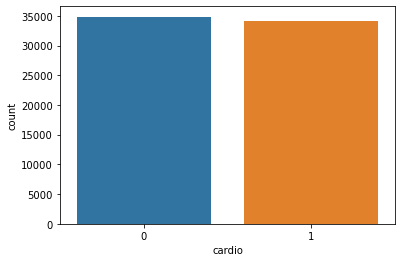

In [21]:
y = data["cardio"]

sns.countplot(y)


cardio_temp = data2.cardio.value_counts()

print(cardio_temp)

In [22]:
print("Percentage of patience without heart problems: "+str(round(cardio_temp[0]*100/70000,2)))
print("Percentage of patience with heart problems: "+str(round(cardio_temp[1]*100/70000,2)))

Percentage of patience without heart problems: 50.03
Percentage of patience with heart problems: 49.97


### Analysing the 'Gender' feature

In [23]:
data["gender"].unique()

array([2, 1], dtype=int64)

##### We notice, that as expected, the 'gender' feature has 2 unique features

<AxesSubplot:xlabel='gender', ylabel='cardio'>

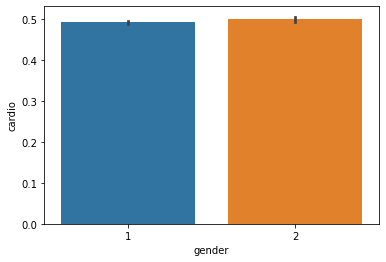

In [24]:
sns.barplot(data["gender"],y)

##### We notice, In this dataset there is not much difference between any gender being more prone 

### Exploring Cholestrol

In [25]:
data['cholesterol'].unique()

array([1, 3, 2], dtype=int64)

<AxesSubplot:xlabel='cholesterol', ylabel='cardio'>

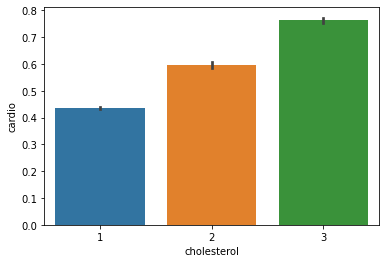

In [26]:
sns.barplot(data["cholesterol"],y)

### Exploring Glucose values

In [27]:
data['gluc'].unique()

array([1, 2, 3], dtype=int64)

<AxesSubplot:xlabel='gluc', ylabel='cardio'>

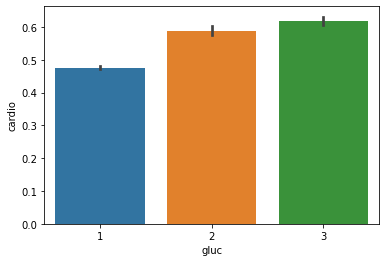

In [28]:
sns.barplot(data["gluc"],y)

### Exploring Smoking factor

In [29]:
data['smoke'].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='smoke', ylabel='cardio'>

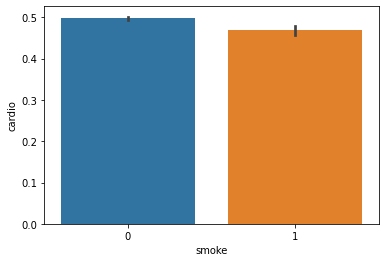

In [30]:
sns.barplot(data["smoke"],y)

### Exploring Alcohol feature

In [31]:
data['alco'].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='alco', ylabel='cardio'>

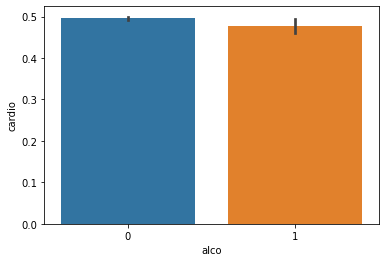

In [32]:
sns.barplot(data["alco"],y)

### Exploring Activity feature

In [33]:
data['active'].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='alco', ylabel='cardio'>

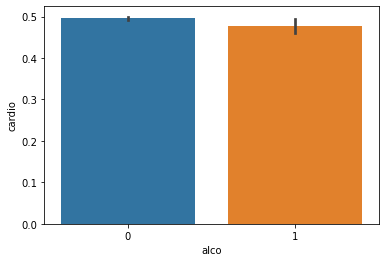

In [34]:
sns.barplot(data["alco"],y)

##  Train Test split

In [35]:
from sklearn.model_selection import train_test_split

predictors = data.drop("cardio",axis=1)
target = data["cardio"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [36]:
X_train.shape

(55187, 11)

In [37]:
X_test.shape

(13797, 11)

In [38]:
Y_train.shape

(55187,)

In [39]:
Y_test.shape

(13797,)

In [40]:
from sklearn.metrics import accuracy_score

## Training the independent variables on various models to find a efficient model to make predictions

## Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [42]:
Y_pred_lr.shape

(13797,)

In [43]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)
print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 71.33 %


## Naive Bayes

In [44]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [45]:
Y_pred_nb.shape

(13797,)

In [46]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 70.02 %


## Decision Tree

In [47]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

Y_pred_dt = clf.predict(X_test)

In [48]:
print(Y_pred_dt.shape)

(13797,)


In [49]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 64.09 %


## Random Tree

In [50]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=300)
rf = rf.fit(X_train, Y_train)

Y_pred_rf = rf.predict(X_test)


In [51]:
Y_pred_rf.shape

(13797,)

In [52]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Random Tree is: 70.74 %


## XGBoost

In [53]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

[20:31:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [54]:
Y_pred_xgb.shape

(13797,)

In [55]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 73.02 %


## K Nearest Neighbors

In [56]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=180)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [57]:
Y_pred_knn.shape

(13797,)

In [58]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 72.38 %


## Neural Network

In [59]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [60]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [61]:
model.fit(X_train,Y_train,epochs=50)

Epoch 1/50
55187/55187 [==============================] - 2s 39us/step - loss: 0.6149 - accuracy: 0.6759
Epoch 2/50
55187/55187 [==============================] - 2s 36us/step - loss: 0.5847 - accuracy: 0.6991
Epoch 3/50
55187/55187 [==============================] - 2s 38us/step - loss: 0.5782 - accuracy: 0.7031
Epoch 4/50
55187/55187 [==============================] - 2s 38us/step - loss: 0.5734 - accuracy: 0.7083
Epoch 5/50
55187/55187 [==============================] - 2s 37us/step - loss: 0.5721 - accuracy: 0.7094
Epoch 6/50
55187/55187 [==============================] - 2s 37us/step - loss: 0.5706 - accuracy: 0.7111
Epoch 7/50
55187/55187 [==============================] - 2s 38us/step - loss: 0.5681 - accuracy: 0.7132
Epoch 8/50
55187/55187 [==============================] - 2s 38us/step - loss: 0.5676 - accuracy: 0.7129
Epoch 9/50
55187/55187 [==============================] - 2s 38us/step - loss: 0.5679 - accuracy: 0.7139
Epoch 10/50
55187/55187 [==============================

In [62]:
Y_pred_nn = model.predict(X_test)
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [63]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

The accuracy score achieved using Neural Network is: 72.63 %


In [64]:
pickle.dump(xgb_model, open("xgb_model.pkl", 'wb'))

In [65]:
#model = pickle.load(open('xgb_model.pkl','rb'))

In [69]:
#Putting together all the algorithm scores to plot them
scores = [score_lr,score_nb,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 71.33 %
The accuracy score achieved using Naive Bayes is: 70.02 %
The accuracy score achieved using K-Nearest Neighbors is: 72.38 %
The accuracy score achieved using Decision Tree is: 64.09 %
The accuracy score achieved using Random Forest is: 70.74 %
The accuracy score achieved using XGBoost is: 73.02 %
The accuracy score achieved using Neural Network is: 72.63 %


In [67]:
!pip install plotly
!pip install -U kaleido


In [70]:
#Importing all the necessary modules for plotting
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

colors = ['gray',] * 7
colors[5] = 'crimson'
text=scores


fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Bar(x=algorithms, y=scores,text=scores,marker_color=colors), 
                     1, 1)

fig.update_layout(
    title='Accuracy of all models',
    xaxis_title="Algorithms",
    yaxis_title="Accuracy Percentage(%)")
    


#fig.update_traces(texttemplate=text+" %", textposition='outside')
fig.write_image("model_accuracy.png")
fig.show()
